In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, pickle, time, warnings
import numpy as np, pandas as pd, scipy, scipy.stats as stats, tqdm, h5py
from copy import deepcopy as copy

# Plotting modules
import matplotlib, corner
from pylab import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# Plotting modules
font = {'family' : 'serif', 'weight' : 'normal',
        'size'   : 16}
legend = {'fontsize': 16}
matplotlib.rc('font', **font)
matplotlib.rc('legend', **legend)
plt.rc('text', usetex=True)
plt.rc('axes', labelsize=16)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('legend',fontsize=16)

cm_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

corner_kwargs = {'max_n_ticks':3, 'title_kwargs':{"fontsize": 16}, 'label_kwargs':{'fontsize':16}}

In [15]:
sys.path.extend(['../utilities/', '../models/'])
import samplers, disk_cone_plcut as dcp, plotting, transformations
from transformations import func_inv_jac, func_labels, label_dict

# Load fits from Saved File

In [22]:
chains = {}; true_pars = {}; param_trans={}; free_pars={}
cmpt=2;
with h5py.File("/data/asfe2/Projects/mwtrace_data/mockmodel/fits_dwarfs_cmpt%d.h" % cmpt, 'r') as hf:
    for key in hf['chain'].keys():
        chains[key]=hf['chain'][key][...]
    for par in hf['true_pars'].keys():
        try: true_pars[par]=hf['true_pars'][par][...]
        except AttributeError:
            true_pars[par]={}
            for par2 in hf['true_pars'][par].keys():
                true_pars[par][par2]=hf['true_pars'][par][par2][...]
    for cmpt_local in hf['param_trans'].keys():
        param_trans[cmpt_local]={}
        for par in hf['param_trans'][cmpt_local].keys():
            param_trans[cmpt_local][par]=hf['param_trans'][cmpt_local][par][...].astype(str).tolist()
            for ii in range(1,5): param_trans[cmpt_local][par][ii]=float(param_trans[cmpt_local][par][ii])
    for cmpt_local in hf['free_pars'].keys():
        free_pars[cmpt_local]=np.array(hf['free_pars'][cmpt_local][...].astype(str))
        
#for j in range(3): true_pars[str(j)]['w']*=true_pars['N']
true_params=[]; params_i = 0
for i, cmpt_local in enumerate(free_pars.keys()):
    for par in free_pars[cmpt_local]:
        try: 
            true_params+=[func_inv_jac[param_trans[str([cmpt,'shd'][i])][par][0]](*param_trans[str([cmpt,'shd'][i])][par][1:3])[1](true_pars[str([cmpt,'shd'][i])][par]),]
        except KeyError: 
            true_params+=[func_inv_jac[param_trans[str([cmpt,'shd'][i])][par][0]](*param_trans[str([cmpt,'shd'][i])][par][1:3])[1](true_pars[par]),]
        params_i += 1;
true_params=np.array(true_params)

labels=[]; params_i = 0
for cmpt in free_pars.keys():
    for par in free_pars[cmpt]:
        labels+=[func_labels[param_trans[cmpt][par][0]](label_dict[par], *param_trans[cmpt][par][1:3]),]
        params_i += 1;

### Component 0

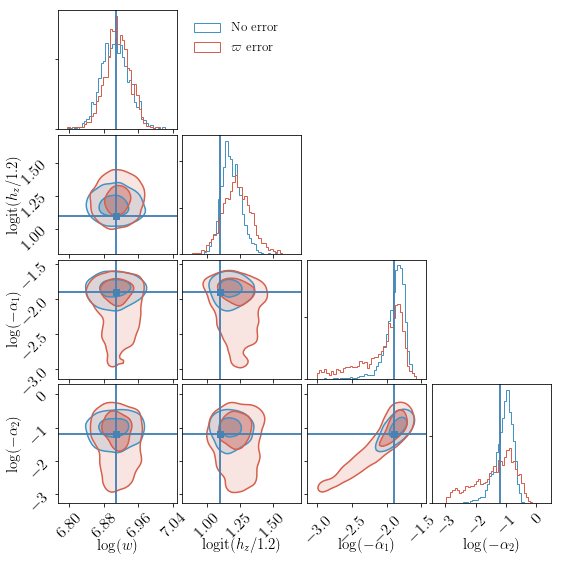

In [19]:
index = ['No error', r'$\varpi$ error']
plotting.layered_corners([chains['full_noerr'], chains['full_perr']], index=index, truths=true_params, labels=labels,
                         colors=[cm.RdBu(0.8), cm.RdBu(0.2)])

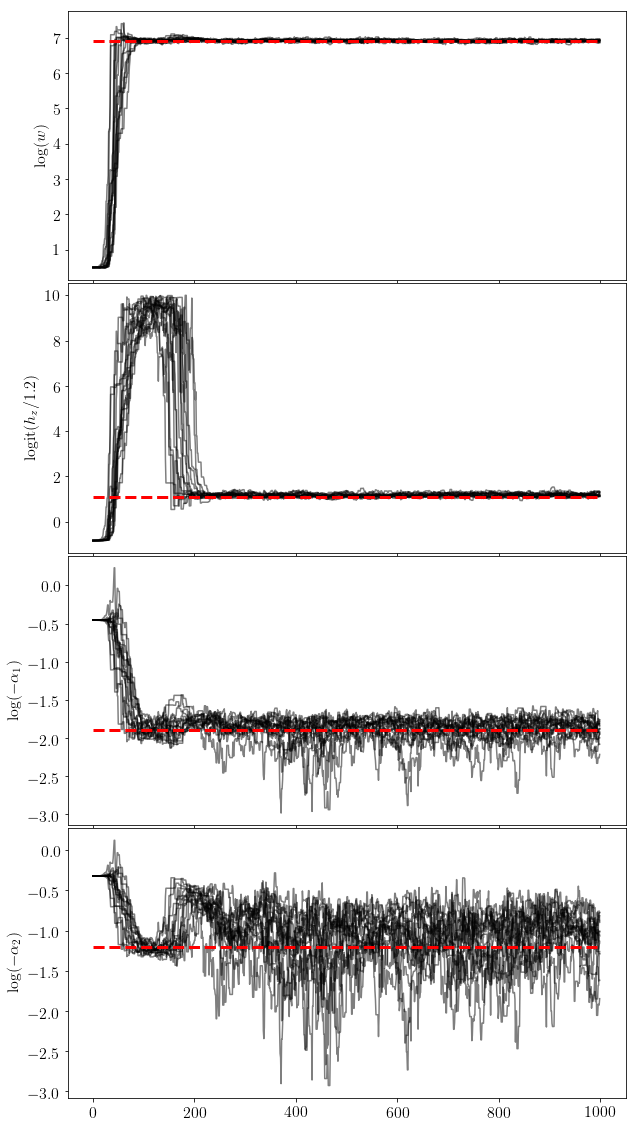

In [20]:
plotting.plot_chains(chains['full_noerr'], truths=true_params, labels=labels)

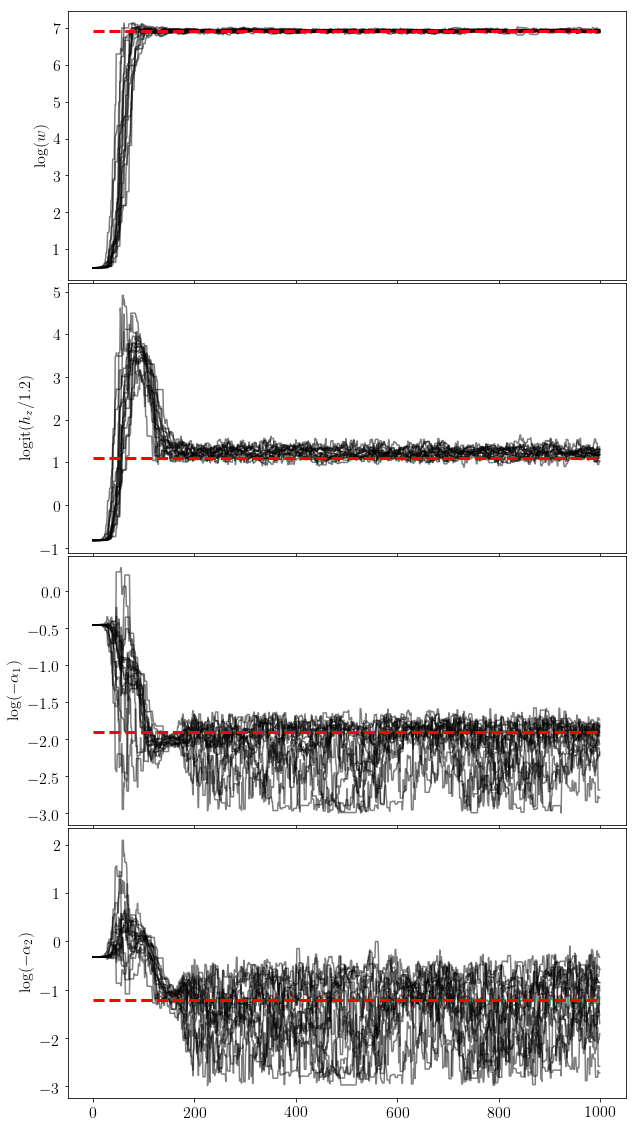

In [21]:
plotting.plot_chains(chains['full_perr'], truths=true_params, labels=labels)

### Component 1

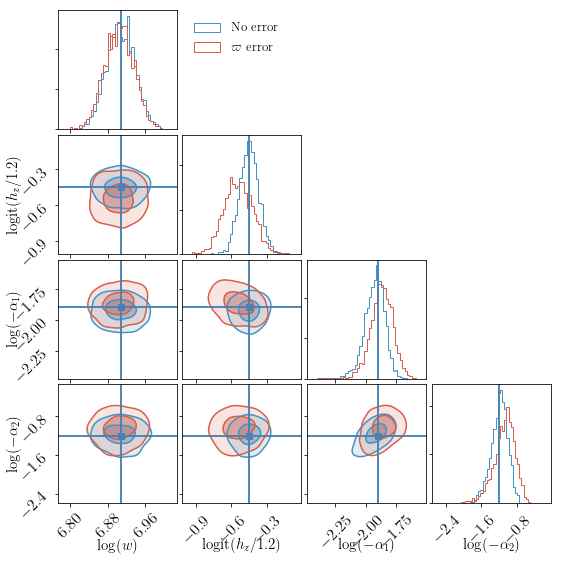

In [237]:
index = ['No error', r'$\varpi$ error']
plotting.layered_corners([chains['full_noerr'], chains['full_perr']], index=index, truths=true_params, labels=labels,
                         colors=[cm.RdBu(0.8), cm.RdBu(0.2)])

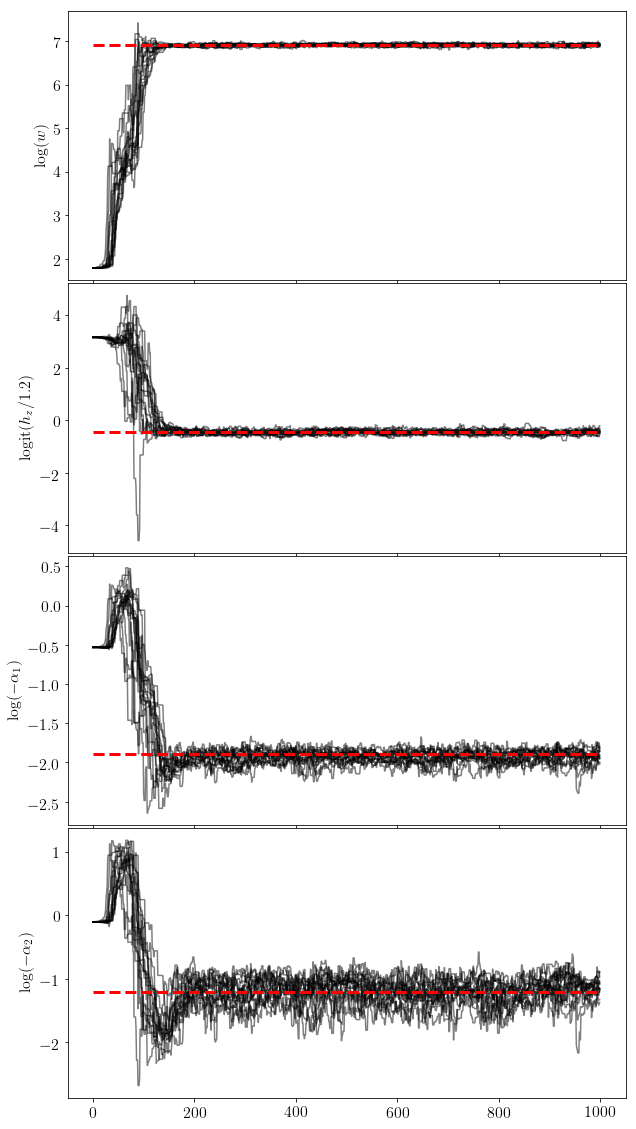

In [238]:
plotting.plot_chains(chains['full_noerr'], truths=true_params, labels=labels)

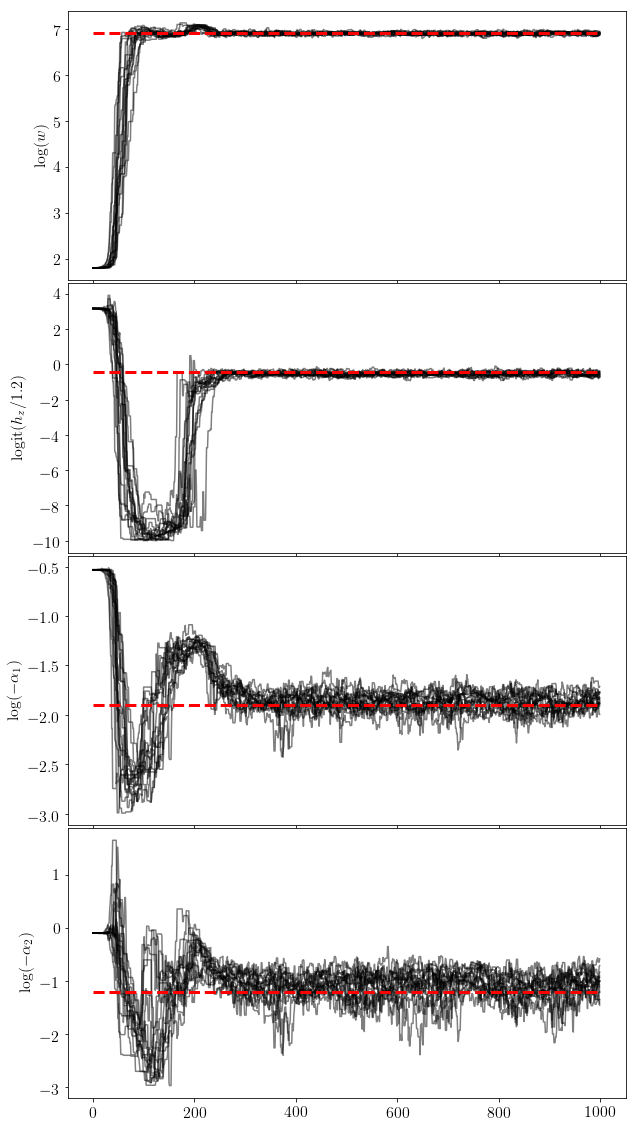

In [239]:
plotting.plot_chains(chains['full_perr'], truths=true_params, labels=labels)

### Component 2

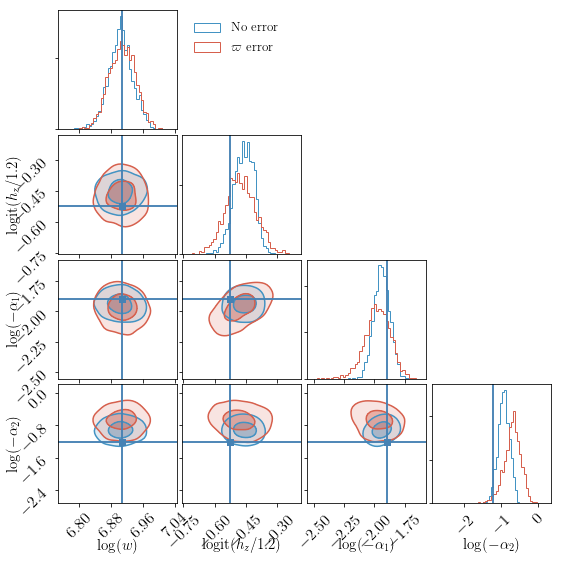

In [23]:
index = ['No error', r'$\varpi$ error']
plotting.layered_corners([chains['full_noerr'], chains['full_perr']], index=index, truths=true_params, labels=labels,
                         colors=[cm.RdBu(0.8), cm.RdBu(0.2)])

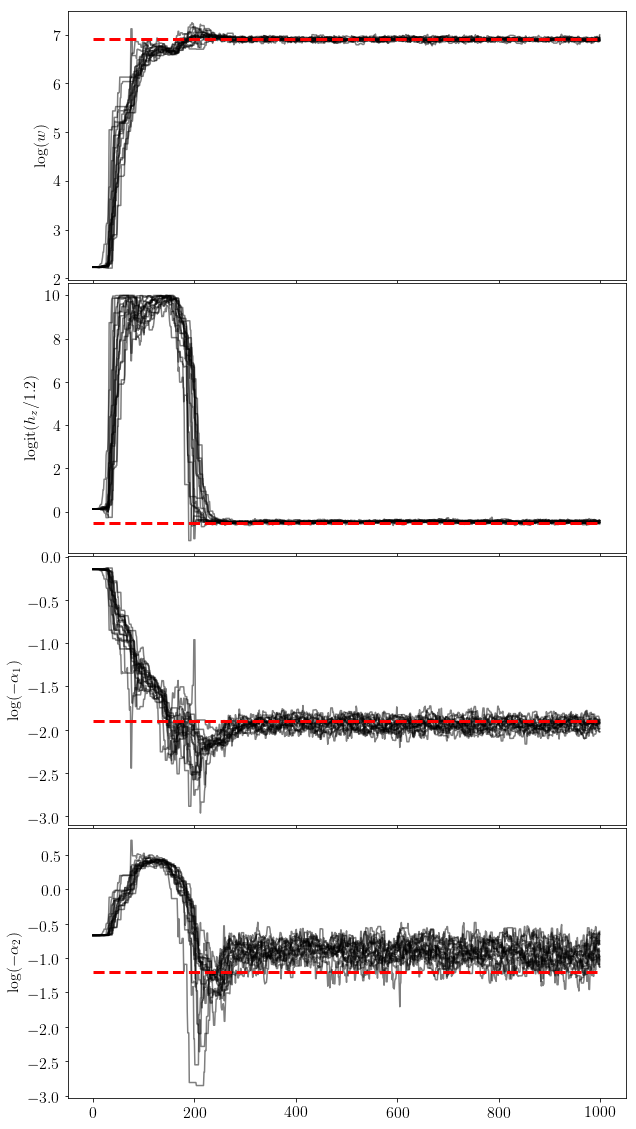

In [254]:
plotting.plot_chains(chains['full_noerr'], truths=true_params, labels=labels)

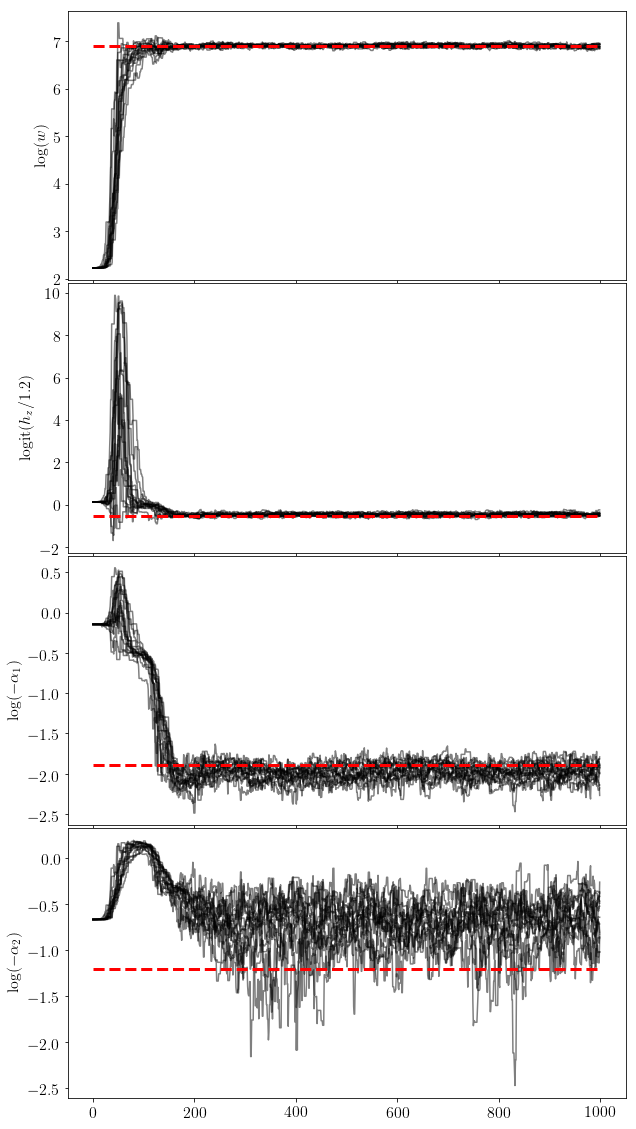

In [255]:
plotting.plot_chains(chains['full_perr'], truths=true_params, labels=labels)

# Load fits from Saved File

In [24]:
chains = {}; true_pars = {}; param_trans={}; free_pars={}
cmpt=2;
with h5py.File("/data/asfe2/Projects/mwtrace_data/mockmodel/fits_cmpt%d.h" % cmpt, 'r') as hf:
    for key in hf['chain'].keys():
        chains[key]=hf['chain'][key][...]
    for par in hf['true_pars'].keys():
        try: true_pars[par]=hf['true_pars'][par][...]
        except AttributeError:
            true_pars[par]={}
            for par2 in hf['true_pars'][par].keys():
                true_pars[par][par2]=hf['true_pars'][par][par2][...]
    for cmpt_local in hf['param_trans'].keys():
        param_trans[cmpt_local]={}
        for par in hf['param_trans'][cmpt_local].keys():
            param_trans[cmpt_local][par]=hf['param_trans'][cmpt_local][par][...].astype(str).tolist()
            for ii in range(1,5): param_trans[cmpt_local][par][ii]=float(param_trans[cmpt_local][par][ii])
    for cmpt_local in hf['free_pars'].keys():
        free_pars[cmpt_local]=np.array(hf['free_pars'][cmpt_local][...].astype(str))
        
#for j in range(3): true_pars[str(j)]['w']*=true_pars['N']
true_params=[]; params_i = 0
for i, cmpt_local in enumerate(free_pars.keys()):
    for par in free_pars[cmpt_local]:
        try: 
            true_params+=[func_inv_jac[param_trans[str([cmpt,'shd'][i])][par][0]](*param_trans[str([cmpt,'shd'][i])][par][1:3])[1](true_pars[str([cmpt,'shd'][i])][par]),]
        except KeyError: 
            true_params+=[func_inv_jac[param_trans[str([cmpt,'shd'][i])][par][0]](*param_trans[str([cmpt,'shd'][i])][par][1:3])[1](true_pars[par]),]
        params_i += 1;
true_params=np.array(true_params)

labels=[]; params_i = 0
for cmpt in free_pars.keys():
    for par in free_pars[cmpt]:
        labels+=[func_labels[param_trans[cmpt][par][0]](label_dict[par], *param_trans[cmpt][par][1:3]),]
        params_i += 1;

### Component 0

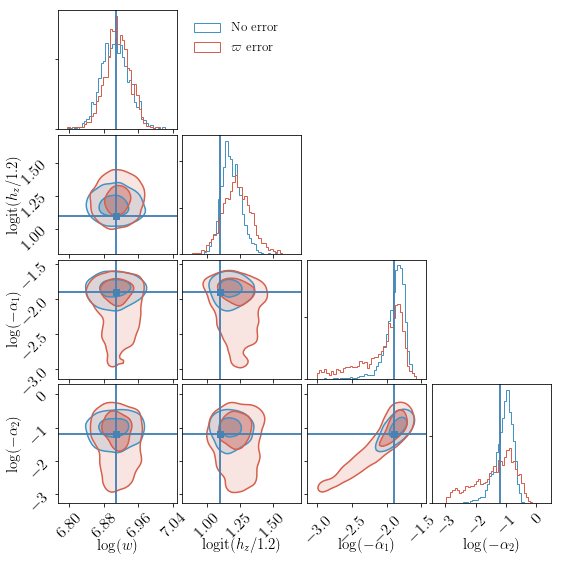

In [19]:
index = ['No error', r'$\varpi$ error']
plotting.layered_corners([chains['full_noerr'], chains['full_perr']], index=index, truths=true_params, labels=labels,
                         colors=[cm.RdBu(0.8), cm.RdBu(0.2)])

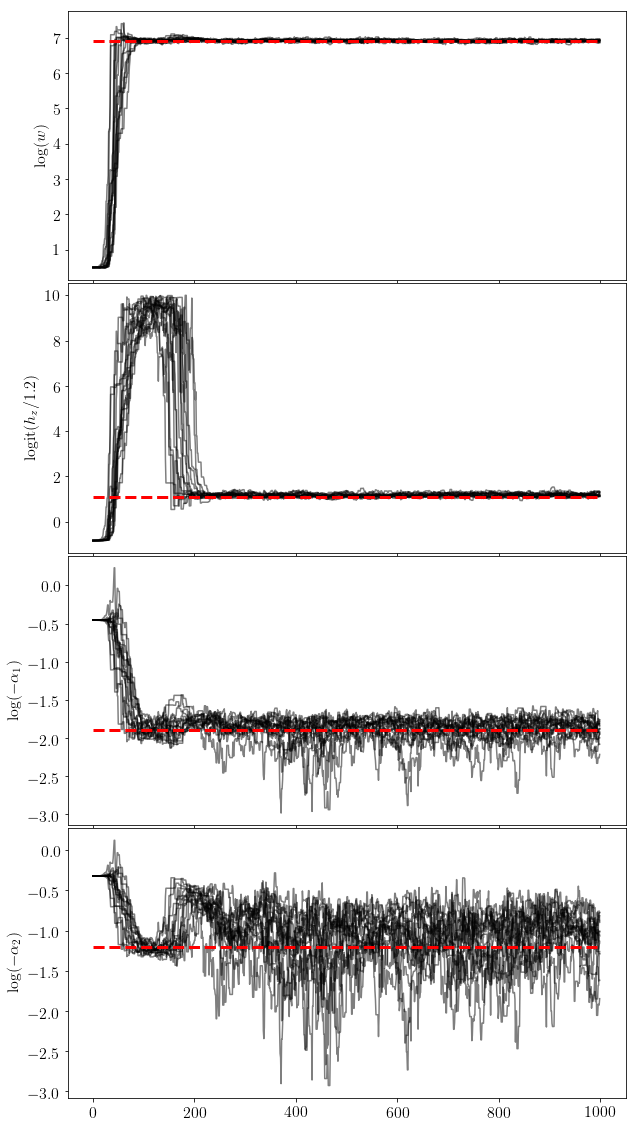

In [20]:
plotting.plot_chains(chains['full_noerr'], truths=true_params, labels=labels)

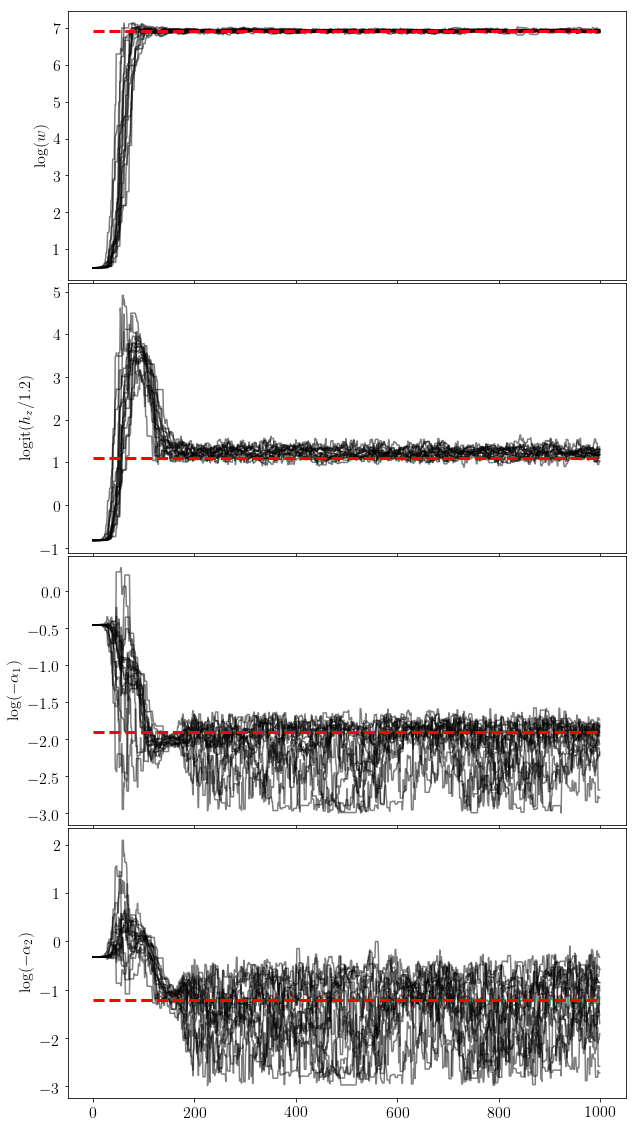

In [21]:
plotting.plot_chains(chains['full_perr'], truths=true_params, labels=labels)

### Component 1

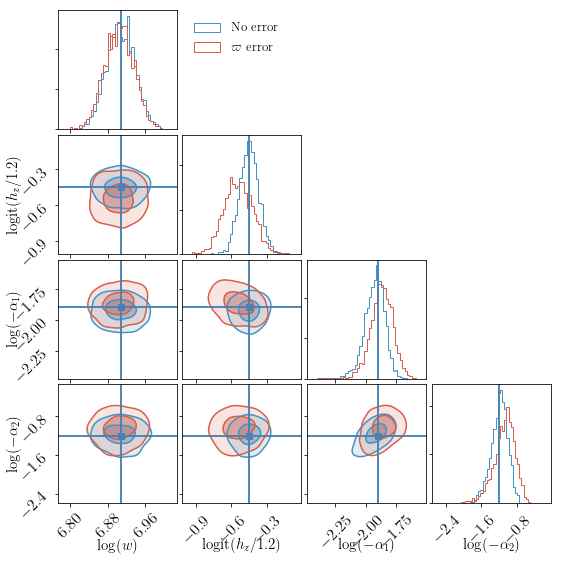

In [237]:
index = ['No error', r'$\varpi$ error']
plotting.layered_corners([chains['full_noerr'], chains['full_perr']], index=index, truths=true_params, labels=labels,
                         colors=[cm.RdBu(0.8), cm.RdBu(0.2)])

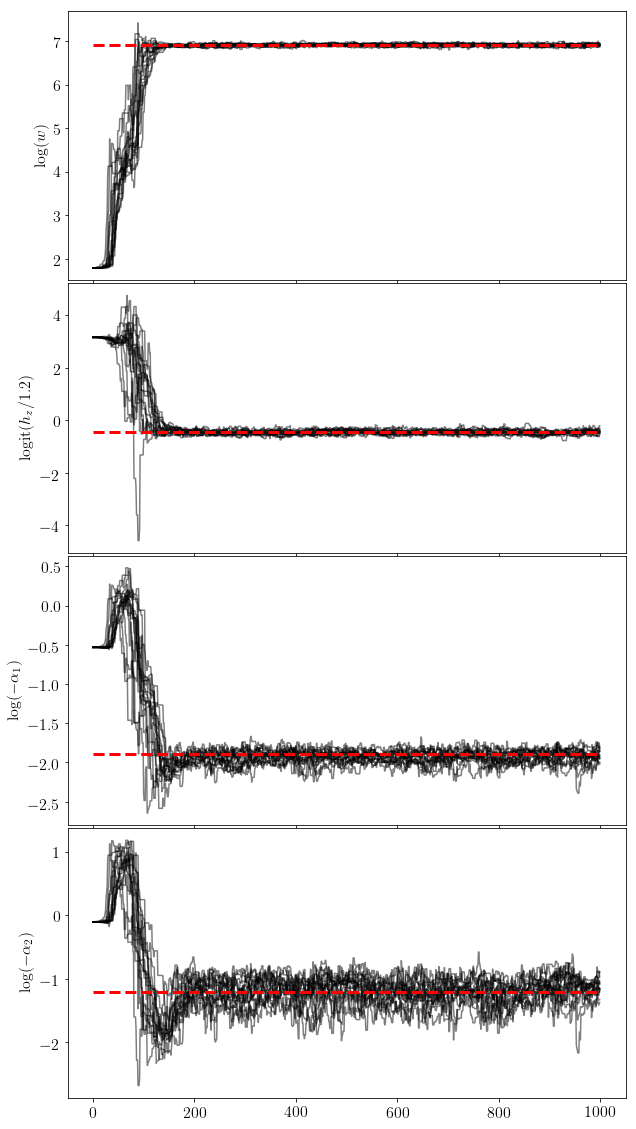

In [238]:
plotting.plot_chains(chains['full_noerr'], truths=true_params, labels=labels)

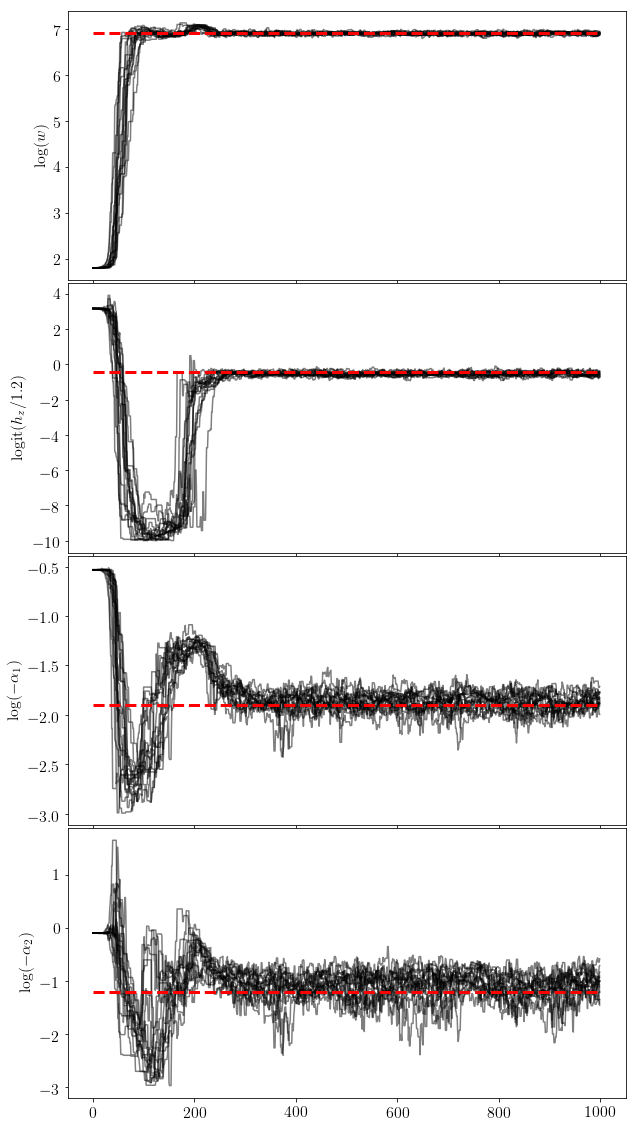

In [239]:
plotting.plot_chains(chains['full_perr'], truths=true_params, labels=labels)

### Component 2

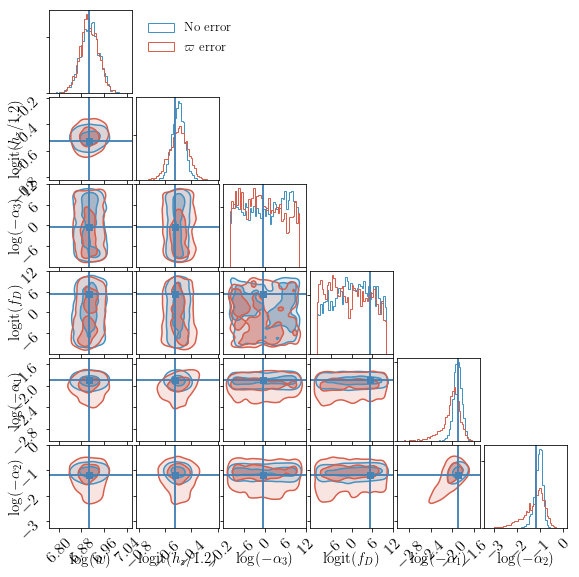

In [25]:
index = ['No error', r'$\varpi$ error']
plotting.layered_corners([chains['full_noerr'], chains['full_perr']], index=index, truths=true_params, labels=labels,
                         colors=[cm.RdBu(0.8), cm.RdBu(0.2)])

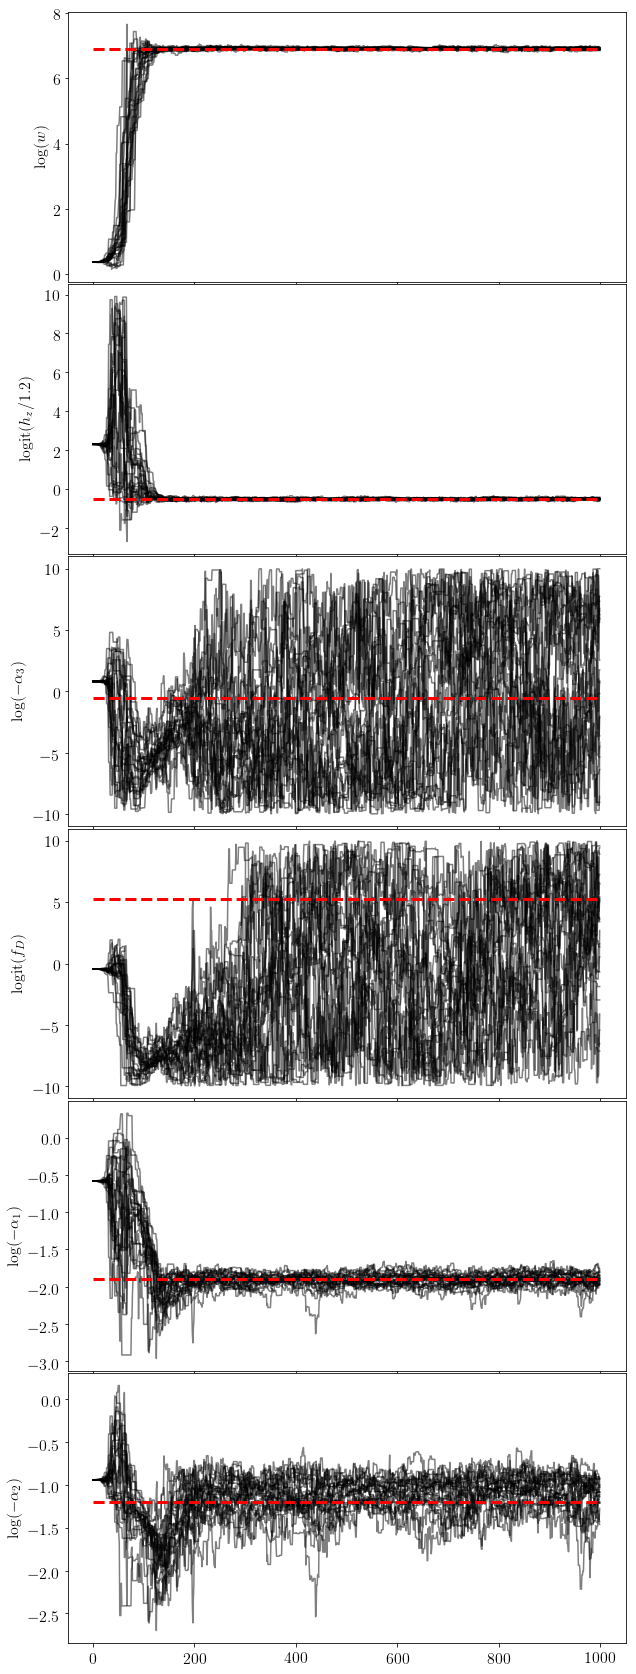

In [26]:
plotting.plot_chains(chains['full_noerr'], truths=true_params, labels=labels)

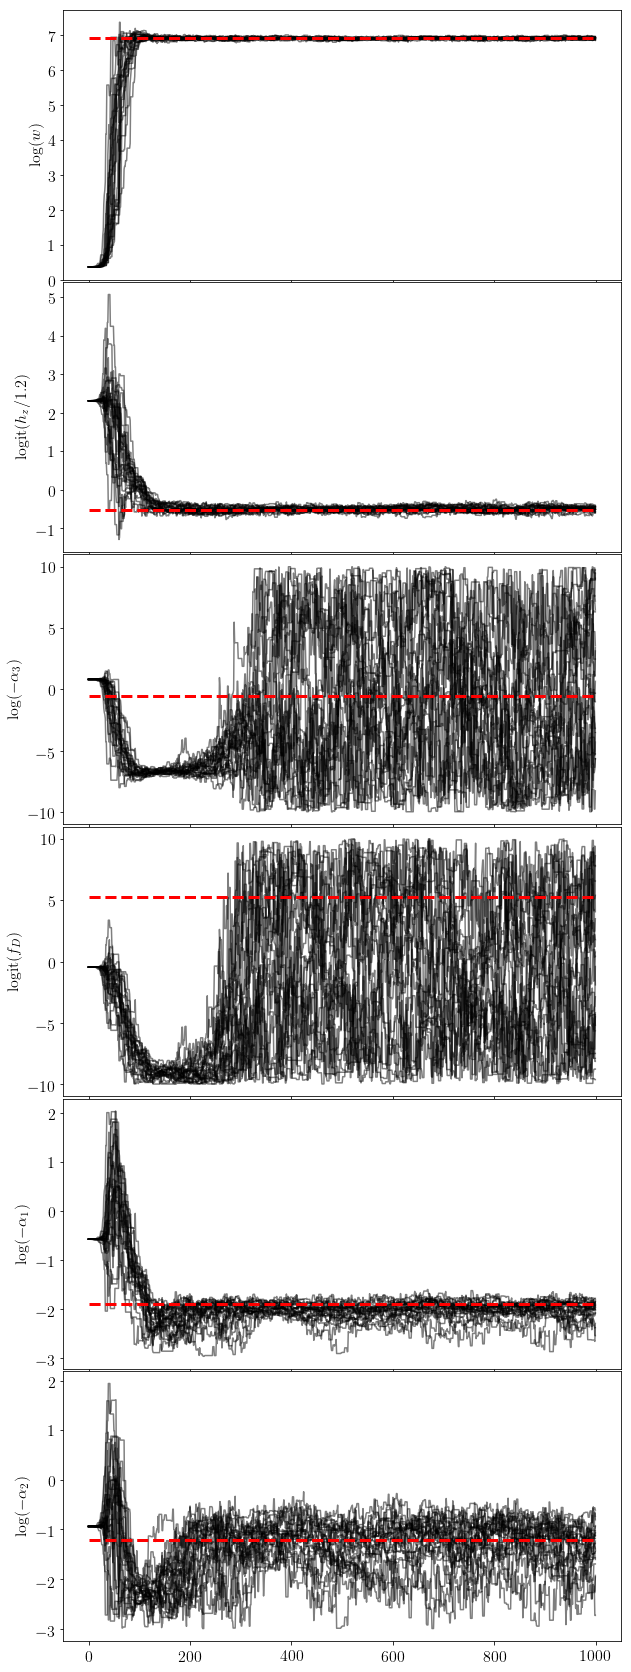

In [27]:
plotting.plot_chains(chains['full_perr'], truths=true_params, labels=labels)